# 7/09/2022

# Computer Vision

# DTM Test Controller

# Muallif: Farrux Sotivoldiyev

**`Kerakli kutubxonalar`**

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

**`Talabalarning titullari turgan path va bosh titul turgan path`**

In [45]:
titul_path = "DATA/DTM_varaqalar/Talabalar/"
main_titul_path = "DATA/DTM_varaqalar/DTM_varaqasi_main.jpg"

**`O'ziga path olib ichidagi barcha rasmlarni o'qib talabalarning ismi va titul varaqalarini qaytaruvchi funksiya`**

In [46]:
# ismni faylning nomidan oladi
def get_load_dataset(path):
    titullar = []
    ismlar = []
    for i in glob.glob(os.path.join(path,"*")):
        titul = plt.imread(i)
        titul = cv2.resize(titul,(1080,720))
        titullar.append(titul)
        
        for j in i.split("\\"):
            if j.find(".")!=-1:
                ismlar.append(j.split(".")[0])
        
    return ismlar,titullar

**`Ma'lumotlar o'qilib o'zgaruvchilarga yozildi`**

In [47]:
load_dataset = get_load_dataset(titul_path)
main_titul = cv2.resize(plt.imread(main_titul_path),(1080,720))

**`3-talaba tituli ko'rsatish uchun`**

In [53]:
talaba = load_dataset[1][3]

**`Asosiy titul varaqasi va Talaba tituli`**

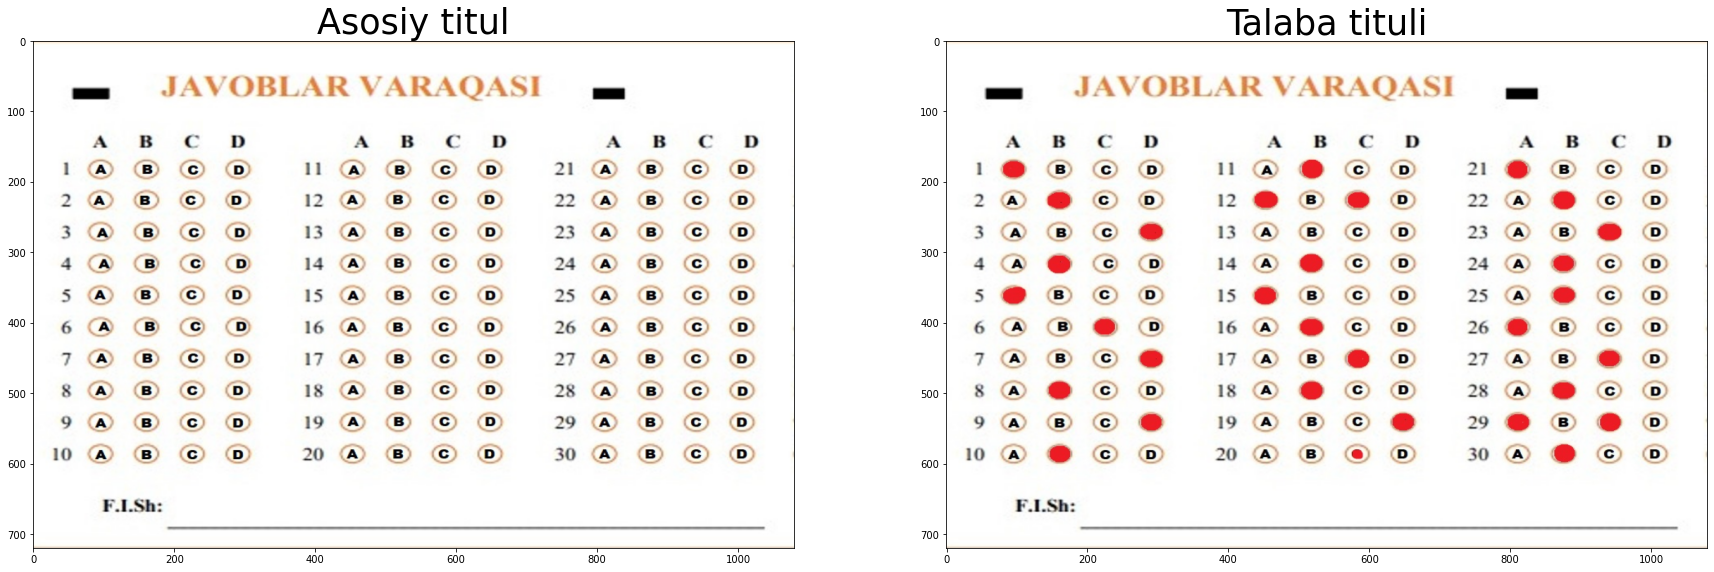

In [54]:
fig,titul = plt.subplots(1,2,figsize=(30,25))
titul[0].set_title("Asosiy titul",size=35)
titul[0].imshow(main_titul)
titul[1].set_title("Talaba tituli",size=35)
titul[1].imshow(talaba)
plt.show()

**`Talabaning titul varaqasini olib uning javoblarini qaytaruvchi funksiya`**

In [55]:
def checking(talaba_varaqasi): 
    range_1 = np.array([200,0,0])
    range_2 = np.array([255,100,100])
    maska = cv2.inRange(talaba_varaqasi,range_1,range_2)
    
    main_titul_copy = main_titul.copy()
    main_titul_copy[maska==0]=0
    
    talaba_javoblari = []
    qatorlar = []
    tayyor_talaba_tituli = {"test_1" : {},"test_2" : {},"test_3" : {},"test_4" : {},"test_5" : {},"test_6" : {},
                             "test_7" : {},"test_8" : {},"test_9" : {},"test_10" : {},"test_11" : {},"test_12" : {},
                             "test_13" : {},"test_14" : {},"test_15" : {},"test_16" : {},"test_17" : {},"test_18" : {},
                             "test_19" : {},"test_20" : {},"test_21" : {},"test_22" : {},"test_23" : {},"test_24" : {},
                             "test_25" : {},"test_26" : {},"test_27" : {},"test_28" : {},"test_29" : {},"test_30" : {}}
    
    for i in range(3):
        for j in range(168,600,45):
            if i==0:
                qatorlar.append(main_titul_copy[j:j+28,75:310])
            elif i==1:
                qatorlar.append(main_titul_copy[j:j+28,434:667])
            else:
                qatorlar.append(main_titul_copy[j:j+28,794:1024])

    for i in range(30):
        test = f"test_{i+1}"
        sanoq = 1
        for j in range(5,225,65):
            if sanoq==1:
                tayyor_talaba_tituli[test]["A"] = qatorlar[i][5:,j:j+30]
            elif sanoq==2:
                tayyor_talaba_tituli[test]["B"] = qatorlar[i][5:,j:j+30]
            elif sanoq==3:
                tayyor_talaba_tituli[test]["C"] = qatorlar[i][5:,j:j+30]
            elif sanoq==4:
                tayyor_talaba_tituli[test]["D"] = qatorlar[i][5:,j:j+30]
            sanoq += 1
            
    for javoblar in tayyor_talaba_tituli:
        variant_qiymati = []
        variant = []
        for variantlar in tayyor_talaba_tituli[javoblar]:
            summa = np.sum(tayyor_talaba_tituli[javoblar][variantlar])
            if summa!=0:
                variant_qiymati.append(summa)
                variant.append(variantlar)
                
        if len(variant)==1:
            if variant_qiymati[0]>200000:
                talaba_javoblari.append(variant[0])
            else:
                talaba_javoblari.append("X")
        else:
            talaba_javoblari.append("X")
                
    return talaba_javoblari

**`Papkadan o'qilgan barcha titul varaqalari va to'g'ri javoblarni olib ularni tekshirib reytingini qaytaruvchi funksiya`**

In [56]:
def dtm_test_checker(names_and_dtm_titles,correct_answers):
    talabalar_reytingi = {}
    for student in range(len(names_and_dtm_titles[1])):
        talaba_javobi = checking(names_and_dtm_titles[1][student])
        togri_javoblar_soni = 0
        
        for i in range(30):
            if correct_answers[i]==talaba_javobi[i]:
                togri_javoblar_soni += 1
                
        natija_foizda = np.round((100*togri_javoblar_soni)/30,2)
        talabalar_reytingi[names_and_dtm_titles[0][student]] = (togri_javoblar_soni,natija_foizda)
        
    return talabalar_reytingi         

**`To'g'ri javoblar`**

In [57]:
correct_answers = ['A','B','D','B','A','C','D','B','D','B','B','A','C','B','A','B','C','B','D','C','A','B','C','B','B','A','C','B','A','B']

**`Oxirgi natija - bunga to'g'ri javoblar soni va shuning foizdagi qiymati keladi`**

In [58]:
result = dtm_test_checker(load_dataset,correct_answers)
result

{'Salmonov_A': (10, 33.33),
 'Sobirov_A': (9, 30.0),
 'Sotivoldiyev_F': (9, 30.0),
 'Vahobov_Sh': (26, 86.67),
 'Xazratqulov_M': (7, 23.33)}

**`Talabaning titul bo'yash darajasi`**
* To'liq bo'yashlarning son qiymati ko'rib chiqilib shunday hulosaga kelindi.
Xulosa shuki eng past son qiymati 243806 va 200000 sonlari oraligida bo'lgani uchun
200000 dan past bo'yash qiymati bo'yalmagan deb olinadi va xato javob sifatida belgilanadi

In [59]:
Test_10 = 243806
test_11 = 289245
test_20 = 44680  # bu to'liq bo'yalmagan aylanacha
test_21 = 287870
chegara = 200000 # deb olindi

**`REYTING`**

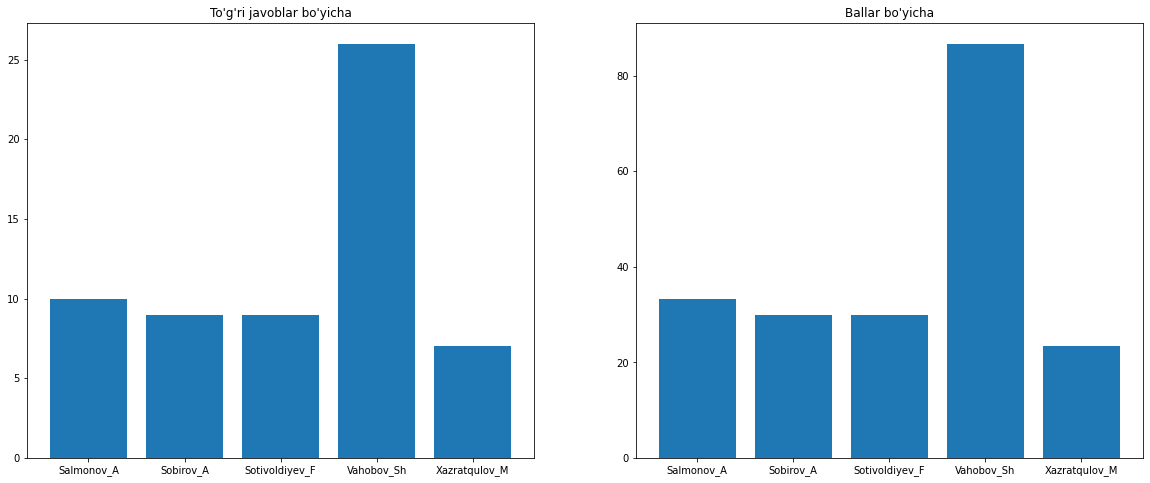

In [60]:
y1 = []; x1 = []; y2 = []; x2 = []
for i in result:
    y1.append(result[i][0]); x1.append(i)
    y2.append(result[i][1]); x2.append(i)
    
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("To'g'ri javoblar bo'yicha")
plt.bar(x1,y1)

plt.subplot(122)
plt.title("Ballar bo'yicha")
plt.bar(x2,y2)
plt.show()